[View in Colaboratory](https://colab.research.google.com/github/cheonbok94/DeepLearningLecture/blob/master/Training_Neural_Network.ipynb)

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import torch 
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F 
import matplotlib.pyplot as plt # 표 및 그림을 띄우는데 쓰이는 라이브러리입니다.
import torchvision # 이미지 관련 처리, Pretrained Model 관련된 Package 입니다. 
import torchvision.datasets as vision_dsets
import torchvision.transforms as T # 이미지 처리 (Vison) 관련된 transformation이 정의 되어 있습니다.
import torch.optim as optim # pytorch 에서 정의한 수 많은 optimization function 들이 들어 있습니다.
from torch.autograd import Variable 
from torch.utils import data

# MNIST Feed-forward Neural Network 

## Data Loader 불러오기

In [0]:
def MNIST_DATA(root='./',train =True,transforms=None ,download =True,batch_size = 64,num_worker = 1):

	print ("[+] Get the MNIST DATA")
	"""
  	torchvision.dataset 에는 우리가 많이 사용하는 데이터들을 쉽게 사용할 수 있도록 되어 있습니다. 
  	Machine Learning 에서 Hello world 라고 불리는 Mnist 데이터를 사용해 보겠습니다. 
  
  
	"""
	mnist_train = vision_dsets.MNIST(root = root,  #root 는 데이터의 저장 위치 입니다. 
									train = True, #Train 은 이 데이터가 train 데이터인지 아닌지에 대한 정보입니다. 
									transform = T.ToTensor(), # 얻어낸 데이터를 pytorch가 계산 할 수 있는 Tensor 로 변환해 줍니다. 
									download = True)  # 데이터를 다운로드 할지 여부를 물어봅니다. 
	mnist_test = vision_dsets.MNIST(root = root,
									train = False,  # Test Data를 가져오기에 Train =False 를 줘야 합니다. 
									transform = T.ToTensor(),
									download = True)
	"""
  	Data Loader 는 데이터와 batch size의 정보를 바탕으로 매 iteration 마다 주어진 데이터를 원하는 batch size 만큼 반환해주는 iterator입니다. 
  	* Practical Guide : Batch size 는 어느정도가 좋나요? -- 클 수록 좋다는 소리가 있습니다. 하지만 gpu memeory 사이즈 한계에 의해 기본적으로 batch size 가 
  	커질 수록 학습에 사용되는 gpu memory 사이즈가 큽니다. (Activation map을 저장해야 하기 때문입니다.) 기본적으로 2의 배수로 저장하는 것이 좋습니다.(Bit size 관련) 
  
	"""
	trainDataLoader = data.DataLoader(dataset = mnist_train,  # DataSet은 어떤 Data를 제공해 줄지에 대한 정보입니다. 여기서는 Training DATA를 제공합니다. 
									batch_size = batch_size, # batch size 정보를 꼭 줘야 합니다. 한 Batch 당 몇 개의 Data 를 제공할지에 대한 정보입니다. 
									shuffle =True, # Training의 경우 Shuffling 을 해주는 것이 성능에 지대한 영향을 끼칩니다. 꼭 True 를 줘야 합니다. 
									num_workers = 1) # num worker의 경우 데이터를 로드하는데 worker를 얼마나 추가하겠는가에 대한 정보입니다. 

	testDataLoader = data.DataLoader(dataset = mnist_test, # Test Data Loader 이므로 Test Data를 인자로 전달해줍니다.
									batch_size = batch_size, # 마찬가지로 Batch size 를 넣어줍니다. 
									shuffle = False, # shuffling 이 굳이 필요하지 않으므로 false를 줍니다. 
									num_workers = 1) #
	print ("[+] Finished loading data & Preprocessing")
	return mnist_train,mnist_test,trainDataLoader,testDataLoader

In [0]:
trainDset,testDset,trainDataLoader,testDataLoader= MNIST_DATA(batch_size = 64)  # Data Loader 를 불러 옵니다. 

In [0]:
# 받아놓은 데이터를 구경해봅시다.

def show_images(image, n_row):
    for _ in range(n_row):  
      index=np.random.choice(64, 6)
      images =image.numpy()[index]    
      plt.figure(figsize=(15,90))    
      for a in range(161, 167):    
        plt.subplot(a)
        plt.imshow(images[a-161])
        plt.xticks([])
        plt.yticks([])    
      plt.show()  

for i, (image,_) in enumerate(trainDataLoader): 
    print(image.size())
    show_images(image.squeeze(), 3)
    break

## Train Function 

In [0]:
def train_network(net,optimizer,trainloader, epochs=2):
  for epoch in range(epochs):  # loop over the dataset multiple times

      running_loss = 0.0 # running loss를 저장하기 위한 변수입니다. 
      for i, data in enumerate(trainloader, 0): # 한 Epoch 만큼 돕니다. 매 iteration 마다 정해진 Batch size 만큼 데이터를 뱉습니다. 
          # get the inputs
          inputs, labels = data # DataLoader iterator의 반환 값은 input_data 와 labels의 튜플 형식입니다. 
          inputs = ??(inputs).cuda() # Pytorch에서 nn.Module 에 넣어 Backprop을 계산 하기 위해서는 Variable로 감싸야 합니다.
          labels = ??(labels).cuda()
          # zero the parameter gradients
          optimizer.zero_grad()    #  현재 기존의 backprop을 계산하기 위해서 저장했던 activation buffer 를 비웁니다. Q) 이걸 안 한다면?

          # forward + backward + optimize
          outputs = ??(inputs) # input 을 넣은 위 network 로 부터 output 을 얻어냅니다. 
          loss = ??(outputs, labels) # loss fucntion에 주어진 target과 output 의 score를 계산하여 반환합니다. 
          loss.backward() # * Scalar Loss value를 Backward() 해주게 되면 주어진 loss값을 바탕으로 backpropagation이 진행됩니다. 
          optimizer.step() # 계산된 Backprop 을 바탕으로 optimizer가 gradient descenting 을 수행합니다. 

          # print statistics
          running_loss += loss.data[0]
          if (i+1) % 100 == 0:    # print every 2000 mini-batches
              print('[epoch %d, iteration %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 100))
              running_loss = 0.0

  print('Finished Training')

## Test Function

In [0]:
def test(model,test_loader):
  model.eval() # Eval Mode 왜 해야 할까요?  --> nn.Dropout BatchNorm 등의 Regularization 들이 test 모드로 들어가게 되기 때문입니다. 
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data, target = Variable(data).cuda(), Variable(target).cuda()  # 기존의 train function의 data 처리부분과 같습니다. 
    output = model(data) 
    pred = output.max(1, keepdim=True)[1] # get the index of the max 
    correct += pred.eq(target.view_as(pred)).sum().data[0] # 정답 데이터의 갯수를 반환합니다. 

  test_loss /= len(test_loader.dataset)
  print('\nTest set:  Accuracy: {}/{} ({:.0f}%)\n'.format(
      correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))

## Neural Network  + Activation Function

### 간단한 Neural Network 를 만들어 봅시다. (linear layers)
특징 : 2개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:28*28 , output : 30 + Activation Fucntion -  ReLU

Layer 2 - input: 30 output:10

Cross Entropy Loss  + ADAM optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__() # nn.Module 생성자 호출 Q) 왜 필요할까요?
        # an affine operation: y = Wx + b
        layers = [] 
        layers.append(nn.Linear(28*28,30))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(30, 10))
        self.main = nn.Sequential(*layers)
    def forward(self, x):
        x = x.??(-1,28*28) # x.view함수는 주어진 인자의 크기로 해당 데이터의 크기를 반환합니다. 즉, (Batch_size,28,28) --> (Batch_size,28*28)로 변환합니다.
        x = ??(x) # 28*28 -> 30 -> Activation function -> 10 으로 10개의 Class에 대한 logit 값을 호출합니다. 
        return x

#### Optimizer 
Optimizer 의 경우 기본적으로 torch.optim 안에 존재합니다. 다양한 optimziers 가 정의되어 있습니다. 

기본적으로 다음과 같은 구성을 따릅니다. optim.{Optimzier 이름}({Network Parameters},lr ={learning rate })

오늘은  Adam optimizer를 주로 사용해보겠습니다.

In [0]:
mnist_net = MNIST_Net().cuda() # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
train_network(mnist_net,optimizer,trainDataLoader) # 3 Epoch 정도 학습을 진행해봅니다. 

In [0]:
test(mnist_net,testDataLoader) # Test 정확도를 출력해 봅니다. 

### 간단한 Neural Network 를 만들어 봅시다. (CNN layers(1) Introduction)
특징 : 2개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:1x28x28 , output : 64x28x28 + Activation Fucntion - relu

Layer 2 - input: 64x28x28 output:1x28x28

Layer 3 - input: 1x28x28=784 output:10

Cross Entropy Loss  + ADAM optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__() # nn.Module 생성자 호출 Q) 왜 필요할까요?
        # an affine operation: y = Wx + b
        layers = []
        layers.append(nn.conv2d(1,64,kernel_size=3,stride=1,padding=1)) 
        layers.append(nn.ReLU()) 
        layers.append(??(64,1,kernel_size=?,stride=?,stride=?)) 
        layers.append(nn.ReLU()) 
        self.main = nn.Sequential(*layers)
        
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
         # x.view함수는 주어진 인자의 크기로 해당 데이터의 크기를 반환합니다. 즉, (Batch_size,1,28,28) --> (Batch_size,28*28)로 변환합니다.
        x = self.main(x)
        x = x.squeeze().view(-1, 28*28)
        x = self.fc(x)  # 10 으로 10개의 Class에 대한 logit 값을 호출합니다. 
        return x

In [0]:
mnist_net = MNIST_Net().cuda() # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
# 네트워크의 구조를 알아봅시다.
print(mnist_net)

In [0]:
train_network(mnist_net,optimizer,trainDataLoader)

In [0]:
test(mnist_net,testDataLoader)

### 간단한 Neural Network 를 만들어 봅시다. (CNN layers(2) BatchNorm)
특징 : 2개의 Layer를 가지는 Neural Network 
<구성>  
Layer 1 - input:1x28x28 , output : 64x28x28 + Activation Fucntion - relu

Layer 2 - input: 64x28x28 output:1x28x28

Layer 3 - input: 1x28x28=784 output:10

Cross Entropy Loss  + ADAM optimizer 

In [0]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__() # nn.Module 생성자 호출 Q) 왜 필요할까요?
        # an affine operation: y = Wx + b
        layers = []
        layers.append(nn.Conv2d(1,64,3,1,1))
        layers.append(??(64)) 
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(64,1,3,1,1))
        layers.append(??(1)) 
        layers.append(nn.ReLU())
        self.main = nn.Sequential(*layers)
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
         # x.view함수는 주어진 인자의 크기로 해당 데이터의 크기를 반환합니다. 즉, (Batch_size,1,28,28) --> (Batch_size,28*28)로 변환합니다.
        x = self.main(x)
        x = x.squeeze().view(-1, 28*28)
        x = self.fc(x)  # 30 -> 10 으로 10개의 Class에 대한 logit 값을 호출합니다. 
        return x

In [0]:
mnist_net = MNIST_Net().cuda() # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
train_network(mnist_net,optimizer,trainDataLoader)

In [0]:
test(mnist_net,testDataLoader)

 - 무조건 Deep하다고 좋은 것은 아니다. 가장 잘 작동하는 네트워크를 찾는 것이 관건!
 - 잘 작동한다고 많이 쓰이는 VGG-net을 살펴봄에 앞서 또 한가지의 데이터셋을 알아보도록 하겠습니다.

# CIFAR-10 Feed-forward Neural Network 

재사용 코드: train_network, test, criterion (cross entropy), optimizer (ADAM)

수정하는 코드:  data_loader (mnist -> cifar10), 네트워크 (VGG-net  구현) 

달라지는 점: 흑백 이미지가 아닌 컬러이미지. 인풋= ( batch_size x 3 x 32 x 32)

목표: 3 x 32 x 32 의 사진에 대하여 10가지의 클래스 중 하나를 맞추기

![alt text](http://solarisailab.com/wp-content/uploads/2017/06/cifar-10_labels.png)


Training image 개수: 50,000장


Test image 개수: 10,000장

In [0]:
def CIFAR_DATA(root='./',train =True,transforms=None ,download =True,batch_size = 64,num_worker = 1):
  print ("[+] Get the CIFAR DATA")
  """
    이번에는 조금 더 실제 사진과 같이 생긴 CIFAR-10 데이터를 사용해보도록 하겠습니다.
  """
  cifar_train = vision_dsets.??(root = root,  #root 는 데이터의 저장 위치 입니다. 
                  train = True, #Train 은 이 데이터가 train 데이터인지 아닌지에 대한 정보입니다. 
                  transform = T.ToTensor(), # 얻어낸 데이터를 pytorch가 계산 할 수 있는 Tensor 로 변환해 줍니다. 
                  download = True)  # 데이터를 다운로드 할지 여부를 물어봅니다. 
  cifar_test = vision_dsets.??(root = root,
                  train = False,  # Test Data를 가져오기에 Train =False 를 줘야 합니다. 
                  transform = T.ToTensor(),
                    download = True)
 
  trainDataLoader = data.DataLoader(dataset = ??,  # Dataset은 어떤 Data를 제공해 줄지에 대한 정보입니다. 여기서는 Training DATA를 제공합니다. 
                  batch_size = batch_size, # batch size 정보를 꼭 줘야 합니다. 한 Batch 당 몇 개의 Data 를 제공할지에 대한 정보입니다. 
                  shuffle =True, # Training의 경우 Shuffling 을 해주는 것이 성능에 지대한 영향을 끼칩니다. 꼭 True 를 줘야 합니다. 
                  num_workers = 1) # num worker의 경우 데이터를 로드하는데 worker를 얼마나 추가하겠는가에 대한 정보입니다. 

  testDataLoader = data.DataLoader(dataset = ??, # Test Data Loader 이므로 Test Data를 인자로 전달해줍니다.
                  batch_size = batch_size, # 마찬가지로 Batch size 를 넣어줍니다. 
                  shuffle = False, # shuffling 이 굳이 필요하지 않으므로 false를 줍니다. 
                  num_workers = 1) #
  print ("[+] Finished loading data & Preprocessing")
  return cifar_train,cifar_test,trainDataLoader,testDataLoader

In [0]:
trainDset,testDset,trainDataLoader,testDataLoader= CIFAR_DATA(batch_size = 64)  # Data Loader 를 불러 옵니다. 

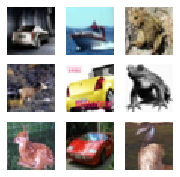

In [0]:
# 이 코드는 cifar10 샘플 이미지를 프린트해보기 위한 코드로 실행만 해주시면 됩니다.
# 실행 시 랜덤으로 트레이닝 때 사용되는 이미지 중 9장이 프린트됩니다.

def show_cifar10(train_loader):
  for images, _ in train_loader:
    plt.figure(figsize=(3,3))
    images_to_show = images.numpy().transpose((0,2,3,1))

    for a in range(331, 340):    
      plt.subplot(a)
      plt.imshow(images_to_show[a-331])
      plt.xticks([])
      plt.yticks([])    
    plt.show()   
    break

show_cifar10(trainDataLoader)

### 간단한 Neural Network 를 만들어 봅시다. (CNN layers(3) Cifar-10)

특징 : 2개의 Layer를 가지는 Neural Network 

<구성>  

Layer 1 - input:3x32x32 , output : 64x32x32 + Activation Fucntion (ReLU)

Layer 2 - input: 64x28x28 output:1x32x32

Layer 3 - input: 1x32x32=1024 output:10

Cross Entropy Loss  + ADAM optimizer 

In [0]:
class CIFAR_Net(nn.Module):
    def __init__(self):
        super(CIFAR_Net, self).__init__() 
        layers = []
        layers.append(nn.Conv2d(??,64,3,1,1))
        layers.append(nn.BatchNorm2d(64)) 
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(64,1,3,1,1))
        layers.append(nn.BatchNorm2d(1)) 
        layers.append(nn.ReLU())
        self.main = nn.Sequential(*layers)
        self.fc = nn.Linear(32*32, 10)

    def forward(self, x):
         # x.view함수는 주어진 인자의 크기로 해당 데이터의 크기를 반환합니다. 즉, (Batch_size,1,32,32) --> (Batch_size,32*32)로 변환합니다.
        x = self.main(x)
        x = x.squeeze().view(-1, 32*32)
        x = self.fc(x) 
        return x

In [0]:
cifar_net = CIFAR_Net().cuda() # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(cifar_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
train_network(cifar_net,optimizer,trainDataLoader)

In [0]:
test(cifar_net,testDataLoader)

## Pytorch 라이브러리에 내장된 VGG-network을 불러와 트레이닝 합시다. (Transfer Learning)

특징 : 19개의 레이어를 지닌 VGG19_bn (batch normalization이 있는 버전)

Cross Entropy Loss  + ADAM optimizer 

![alt text](https://lihan.me/assets/images/vgg-hero-cover.jpg)

### Version 1:  랜덤 initialized된 네트워크 트레이닝하기


In [0]:
# pytorch에 들어 있는 모델을 불러오는 코드입니다.
import torchvision.models as models
skeleton_vgg=models.vgg19_bn(pretrained=False) # 여기서 pretrained=True를 걸어주시면 이미지넷 백만장에 대하여 미리 학습된 모델을 불러올 수 있습니다.

In [0]:
# 불러들여온 모델이 어떻게 생겼는지 한번 살펴볼까요?
print(skeleton_vgg)

In [0]:
# 아래의 클래스를 통하여 저희는 vgg-19의 랜덤으로 initialized된 네트워크 뼈대를 얻어낼 수 있습니다.
class CIFAR_Net(nn.Module):
    def __init__(self, skeleton_vgg):
        super(CIFAR_Net, self).__init__() 
        layers = []
        layers = list(skeleton_vgg.features.children()) # 미리 학습된 VGGNet의 설정된 변수들만 가져오되,pretrained=False이므로 랜덤으로 initialize되어 있습니다.
        self.main = nn.Sequential(*layers)
        self.fc = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.main(x)
        x = x.squeeze()
        x = self.fc(x) 
        return x

In [0]:
cifar_net = CIFAR_Net(skeleton_vgg).cuda() # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(cifar_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
train_network(cifar_net,optimizer,trainDataLoader, epochs=1)

In [0]:
test(cifar_net,testDataLoader)

###Version 2: Pre-trained된 네트워크 추가 트레이닝하기 (fine-tuning)

In [0]:
# pytorch에 들어 있는 모델을 불러오는 코드입니다.
import torchvision.models as models
pre_vgg=models.vgg19_bn(pretrained=True) # 여기서 pretrained=True를 걸어주시면 이미지넷 백만장에 대하여 미리 학습된 모델을 불러올 수 있습니다.

In [0]:
# 아래 코드는 이제 vgg-19을 이미지넷에 트레이닝한 학습 모델까지 일부 받아들여오게 됩니다.
class CIFAR_Net(nn.Module):
    def __init__(self, pre_vgg):
        super(CIFAR_Net, self).__init__() 
        layers = []
        layers = list(pre_vgg.features.children()) 
        self.main = nn.Sequential(*layers)
        self.fc = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.main(x)
        x = x.squeeze()
        x = self.fc(x) 
        return x

In [0]:
cifar_net = CIFAR_Net(pre_vgg).cuda() # 생성한 뉴럴넷 Instance를 생성하고 빠른 학습을 위해 cuda 에 올립니다. 
criterion = nn.CrossEntropyLoss() # Loss Function을 정의 합니다. 여기서는 cross entrophy loss 를 사용합니다. 
optimizer = optim.Adam(cifar_net.parameters(), lr=0.001) # optimizer는 이와 같이 training 할 Parameter와 learning rate를 인자로 줍니다. 

In [0]:
train_network(cifar_net,optimizer,trainDataLoader, epochs=1)

In [0]:
test(cifar_net,testDataLoader)

## 수고하셨습니다 :)